# Pymaceuticals Inc.
### Analysis
* The data shows a high correlation between the mouse weight and the average tumor volume (r = 0.84). Moverover, the r-squared value is 0.71 indicating that 71% of the data fits the regrasion model.
* From the four drugs analyzed in depth, Capmulin and Ramicane show the better results with smaller tumor volumes. Additionally, the boxplots of these four treatments show outliers for the Infubinol drug only.
* Some other metrics show that the Capomulin drug was used the most with 230 number of mice tested while 148 mouse were tested with Propriva drug. Female and male mice participation were smiliar (51% vs 49%).

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv('data/Mouse_metadata.csv')
study_results = pd.read_csv('data/Study_results.csv')

In [3]:
# Combine data into a single dataset and display for preview
df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'left')
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unilist = []
duplist = []
for i in range(len(df['Mouse ID'])):
    unique_key = df['Mouse ID'][i] + "-" + str(df['Timepoint'][i])
    if unique_key not in unilist:
        unilist.append(unique_key)
    else:
        duplist.append(df['Mouse ID'][i])
np.unique(duplist)

array(['g989'], dtype='<U4')

In [6]:
# Get all the data for the duplicate mouse ID.
df[df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df[df['Mouse ID'] != 'g989']
df_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
len(df_clean['Mouse ID'].unique())

248

### Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = df_clean.groupby(df_clean['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = df_clean.groupby(df_clean['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = df_clean.groupby(df_clean['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = df_clean.groupby(df_clean['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = df_clean.groupby(df_clean['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean Tumor Volume':mean,
                           'Median Tumor Volume': median,
                           'Tumor Volume Variance': variance,
                           'Tumor Volume Std. Dev':std,
                           'Tumor Volume Std. Err':sem
                          })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df_two = df_clean.groupby(df_clean['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(['mean','median', 'var', 'std', 'sem'])
summary_df_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Bar and Pie Charts

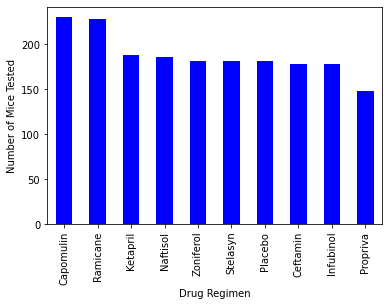

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
numb = df_clean['Drug Regimen'].value_counts()
bar_chart = numb.plot(kind='bar', facecolor='blue')
bar_chart.set_xlabel('Drug Regimen')
bar_chart.set_ylabel('Number of Mice Tested')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

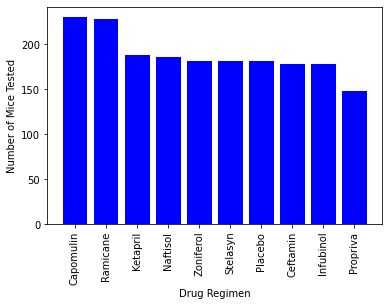

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
numb = df_clean['Drug Regimen'].value_counts()
xticklabels = numb.index
plt.bar(xticklabels, numb, color='b')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show

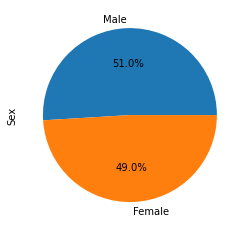

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = df_clean['Sex'].value_counts()
pie_chart = sex.plot(kind='pie', autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

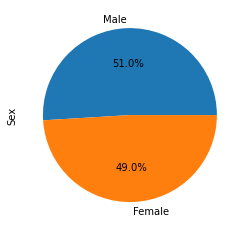

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = df_clean['Sex'].value_counts()
index = sex.index
plt.pie(sex, labels=index, autopct="%1.1f%%")
plt.ylabel('Sex')

### Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = df_clean.groupby(df_clean['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, df_clean, on = ['Mouse ID', 'Timepoint'], how = 'left')
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
# Put treatments into a list for for loop (and later for plot labels)   
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

for i in treatments:
    sublist = []
    for n in range(len(final_tumor_volume)):
        if final_tumor_volume['Drug Regimen'][n] == i:
            sublist.append(final_tumor_volume['Tumor Volume (mm3)'][n])
    tumor_volume_data.append(sublist)

# Convert list into a DataFrame for statistical analysis
tumor_summary_df = pd.DataFrame({'Capomulin': tumor_volume_data[0],
                                 'Ramicane': tumor_volume_data[1],
                                 'Infubinol': tumor_volume_data[2],
                                 'Ceftamin': tumor_volume_data[3],                                
                                })

# Determine key statistical metrics
stats = []
for i in treatments:
    sublist = []
    quartiles = tumor_summary_df[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq - lowerq, 2)
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    sublist.extend([lowerq, upperq, iqr, lower_bound, upper_bound])
    stats.append(sublist)

# Statistics information summary
n=0
for i in treatments:
    x = 0
    print(f"The lower quartile of {i} treatments is: {stats[n][x]}")
    x += 1
    print(f"The upper quartile of {i} treatments is: {stats[n][x]}")
    x += 1
    print(f"The upper interquartile range of {i} treatments is: {stats[n][x]}")
    x += 1
    print(f"Values below {stats[n][x]} could be {i} outlier")
    x += 1
    print(f"Values above {stats[n][x]} could be {i} outlier")
    print("------------------------------------------------------------")
    n += 1

# Determine outliers for each treatment.
x = 0
outliers = []
for i in treatments:
    sublist = []
    for n in range(len(tumor_summary_df[i])):        
        if (tumor_summary_df[i][n] > stats[x][4]) or (tumor_summary_df[i][n] < stats[x][3]):
            sublist.append(round(tumor_summary_df[i][n], 2))
    outliers.append(sublist)
    x += 1

x = 0
for i in treatments:    
    if not outliers[x]:
        print(f"{i} presents no outliers")
    else:
        print(f'{i} presents the following outliers: {outliers[x]}')
    x += 1

The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The upper interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outlier
Values above 51.83 could be Capomulin outlier
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The upper interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outlier
Values above 54.31 could be Ramicane outlier
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The upper interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outlier
Values above 82.75 could be Infubinol outlier
------------------------------------------------------------
The lower quartile of Ceftamin treatmen

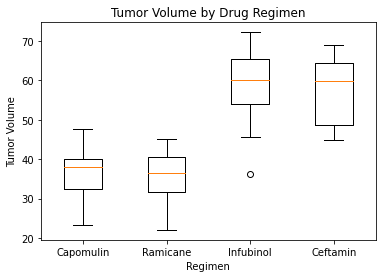

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(tumor_volume_data, labels = treatments)
plt.show()

### Line and Scatter Plots

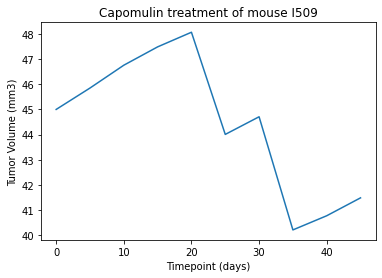

In [18]:
capomulin_df = df_clean.loc[(df_clean['Drug Regimen'] == 'Capomulin') & (df_clean['Mouse ID'] == 'l509')]

plt.plot(capomulin_df['Timepoint'], capomulin_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse I509')
plt.show()

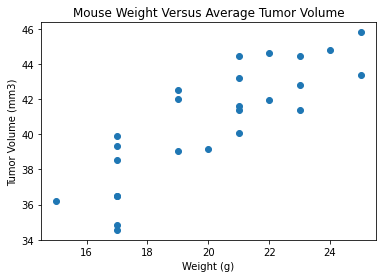

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg_df = df_clean.loc[df_clean['Drug Regimen'] == 'Capomulin'].groupby(df_clean['Mouse ID']).mean()
capomulin_avg_df
plt.scatter(capomulin_avg_df['Weight (g)'], capomulin_avg_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()

### Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


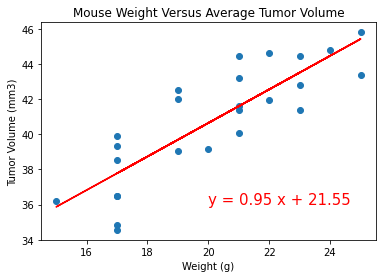

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin_avg_df["Weight (g)"]
volume = capomulin_avg_df["Tumor Volume (mm3)"]

slope, intercept, rvalue, pvalue, stderr = linregress(weight, volume)
regress_values = capomulin_avg_df["Weight (g)"]* slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"The correlation between mouse weight and the average tumor volume is: {round(rvalue, 2)}")

plt.scatter(capomulin_avg_df['Weight (g)'], capomulin_avg_df['Tumor Volume (mm3)'])
plt.plot(capomulin_avg_df["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(20,36), fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()
